Maestría en Inteligencia Artificial Aplicada

Curso: Inteligencia Artificial y Aprendizaje Automático

Tecnológico de Monterrey

Prof Luis Eduardo Falcón Morales

Adtividad de la Semana 9

Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)

Nombres y matrículas de los integrantes del equipo:


1.   Juan Pablo Acosta López - A01794035
1.   Genaro Rodriguez Vazquez A01150931
2.   Elemento de la lista
1.   Elemento de la lista
2.   Elemento de la lista












Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. 
Como has notado a lo largo del curso, una gran cantidad de métricas se han estado utilizando a lo largo 
de los diferentes tipos de problemáticas. Aunque en general sabemos que un problema generalmente 
no se aborda usando una sola métrica, sí conviene tener una idea clara de qué información nos 
proporciona cada una de las diferentes métricas que se seleccionan. Asimismo tener claro que la 
comparación de modelos diferentes con métricas diferentes no siempre es del todo válido. 
En particular, para los problemas de clasificación se propone una taxonomía de las métricas para 
clasificación por los autores del siguiente artículo: 
C. Ferri, J. Hernández-Orallo, R. Modroiu, An experimental comparison of performance measures for 
classification, Pattern Recognition Letters, Volume 30, Issue 1, 2009, Pages 27-38. 
https://scholar.google.com/scholar?q=10.1016%2Fj.patrec.2008.08.010%20An%20experimental%20comparison%20of%20performance%20measures%20for%20classification%20Pattern%20recognition%20letters%202009%200167-8655%20FERRI%20C%20HERNANDEZ-ORALLO%2C%20J%20MODROIU%2C%20R%20 


1) Realiza un resumen de máximo 1 cuartilla de dicho artículo. 
Con base a la taxonomía de tres tipos de métricas definidas en el artículo (threshold, probabilistic and 
ranks) analiza los siguientes conjuntos de datos y en cada uno de ellos deberás hacer una propuesta de 
cuál o cuáles serían las mejores métricas a utilizar en cada caso. Justifica adecuadamente cada 
propuesta de acuerdo al tipo de problema y tipo de datos.  
En particular haz énfasis en la métricas que hemos estado estudiando en el curso, las cuales de manera 
general han sido varias de las principales que usualmente se aplican, o en dado caso algunas de sus 
variantes. Asimismo determina se lo consideras un problema de clases o no balanceadas. Lee la 
información de cada liga para que contextuelices el “entendimiento del negocio”. 
NOTA: Puedes hacer una inspección de los datos, pero no se tienen que ejecutar modelos para su entrenamiento y evaluación.  

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import requests, zipfile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
import math as math

pd.set_option('display.max_columns', None)

#1er base de datos - Breast Cancer data

In [2]:
Breast_cancer_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df1 = pd.read_csv(Breast_cancer_data_url,sep=',',header=None)
df1.rename(columns={0: 'Sample_code_number', 1: 'Clump_Thickness', 2:'Uniformity_of_Cell_Size',3:'Uniformity_of_Cell_Shape',4:'Marginal_Adhesion',5:'Single_Epithelial_Cell_Size',6:'Bare_Nuclei',7:'Bland_Chromatin',8:'Normal_Nucleoli',9:'Mitoses',10:'Class'}, inplace=True)
df1

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<BarContainer object of 2 artists>

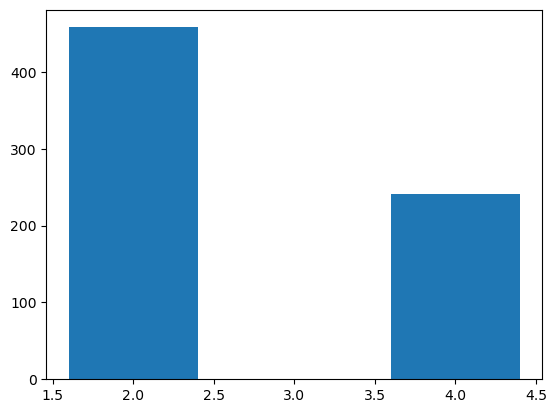

In [3]:
#Contaremos las frecuencias de cada una de las categorías de la variable independiente
plt.bar(df1['Class'].unique(),df1.Class.value_counts())

   Class      Perc
2    458  0.655222
4    241  0.344778


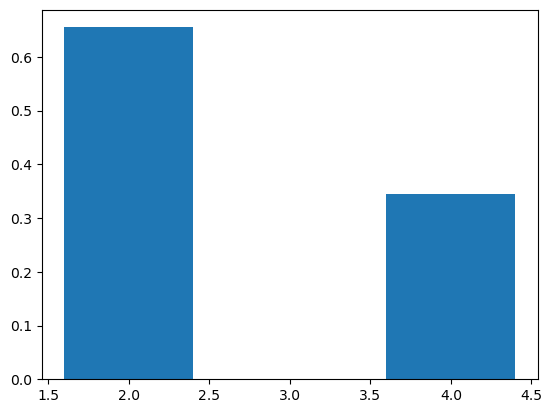

In [4]:
Porcentaje = pd.DataFrame(df1.Class.value_counts())
Porcentaje['Perc'] = Porcentaje['Class']/Porcentaje['Class'].sum()
print(Porcentaje)
plt1 = plt.bar(Porcentaje.index.unique(),Porcentaje['Perc'])


    Podemos observar que esta base de datos de cáncer de senos tiene clases de la variable independiente ligeramente desbalanceadas, por lo tanto podría ser factible hacer técnicas de sub muestreo o sobre muestreo sin embargo podrían no ser necesarias.

    Respecto a la métrica, se entiende que la predicción de una enfermedad cae dentro de los casos en el cual es muy difícil ponerle un precio el hecho de diagnosticar a alguien con una enfermedad, por lo tanto, en este caso en espceífico es más importante medir el recall que la precisión, sin embargo, dado que por temas de tiempo para atender a todos los posibles pacientes, se recomienda maximizar el recall a un k de precisión que permita atender a varios pacientes al día, sin saber que tanto tiempo tardan las pruebas de diagnóstico no se puede calcular el k óptimo de la precisión.

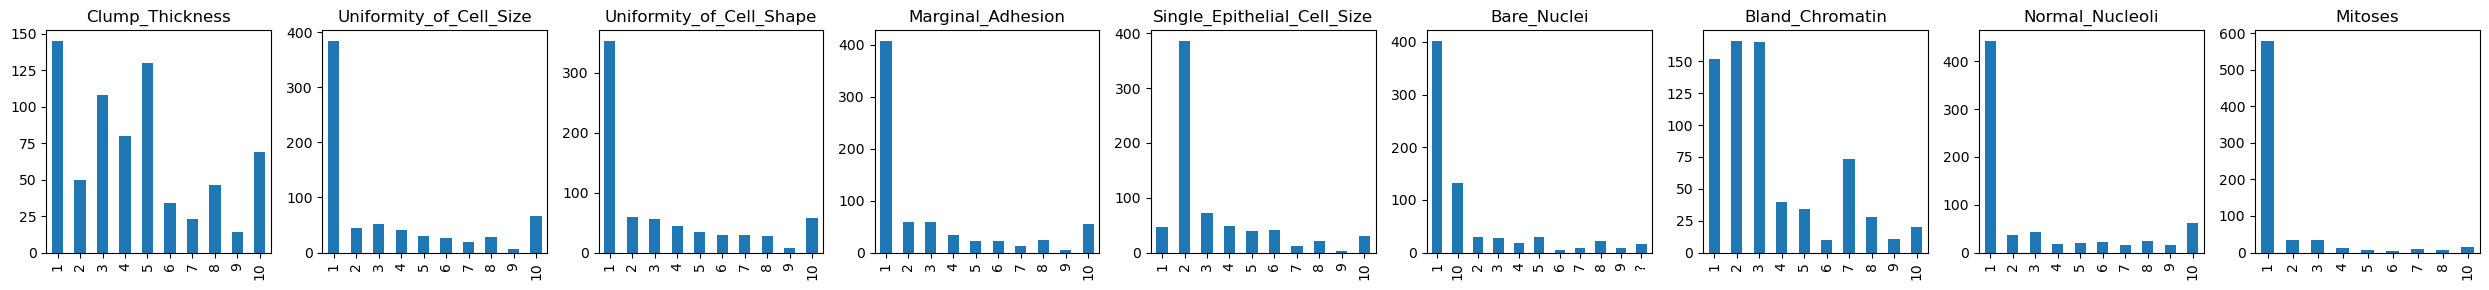

In [5]:
#Para verificar la distribucion de variables cuantitativas

df2_categ = df1.copy()

X = df1.drop(['Class','Sample_code_number'] , axis='columns')  

fig, axes = plt.subplots(ncols=len(X.columns), figsize=(25,3))
for col, ax in zip(X, axes):
    X[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.tight_layout()    
plt.show()    

    Al evaluar su distribucion, vemos que en 6 de lasa 8 variables de entrada (sample coude number debe de ser eliminada, ya que actua como simple index), hay una distribucion para nada normal (cargada a la izquierda), sera necesario realizar un pipeline que escale estos valores segun el maximo y minimo de todo el datset X. 
    
    Debido a que la mayoria de las variables de entrada son de tipo cuantitativo, algun modelo de regresion lineal deberia de ser el mejor en predecir de forma correcta la clase de salida, sin requerir demasiada capacidad de computo.

#2da base de datos - Telco Customer Churn

In [6]:
Telco_Customer_Churn_data_url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df2 = pd.read_csv(Telco_Customer_Churn_data_url,sep=',')
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<BarContainer object of 2 artists>

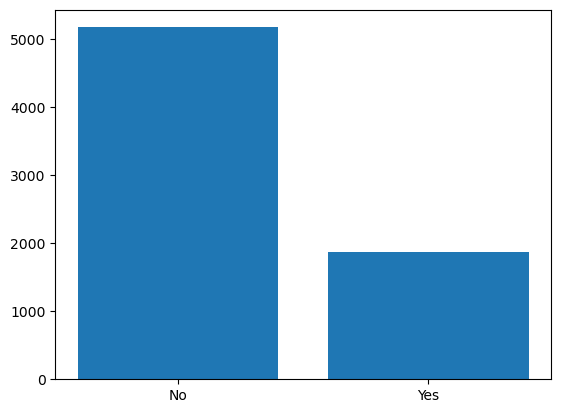

In [7]:
#Contaremos las frecuencias de cada una de las categorías de la variable independiente
plt.bar(df2['Churn'].unique(),df2.Churn.value_counts())

     Churn     Perc
No    5174  0.73463
Yes   1869  0.26537


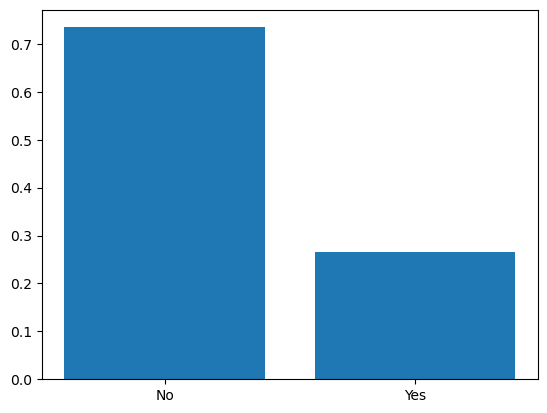

In [8]:
Porcentaje = pd.DataFrame(df2.Churn.value_counts())
Porcentaje['Perc'] = Porcentaje['Churn']/Porcentaje['Churn'].sum()
print(Porcentaje)
plt2 = plt.bar(Porcentaje.index.unique(),Porcentaje['Perc'])

    Podemos observar en esta base de datos de abandono de clientes de una base de telecomunicación tiene clases de variable independiente desbalanceadas, por lo tanto es recomendable pasar los datos a través de procesos de sobre muestreo y sub muestreo.

    Desde el punto de vista de negocio, según la literatura mantener a un cliente es mucho más barato que obtener nuevos clientes, por lo tanto desde el punto de vista de negocio es muy importante el mantenimiento de los clientes, por lo tanto en este caso se quisiera maximizar el recall para poder identificar la mayoría de los clientes que pudieran abandonar. Como contrapeso a querer maximizar el recall, se debería de analizar el costo de catalogar como posible abandono a alguien que realmente no va abandonar, dependiendo de cuál sea el mecanismo que se implemente para los posibles abandonos tendríamos que evaluar que tan caro podrían ser los falsos positivos.

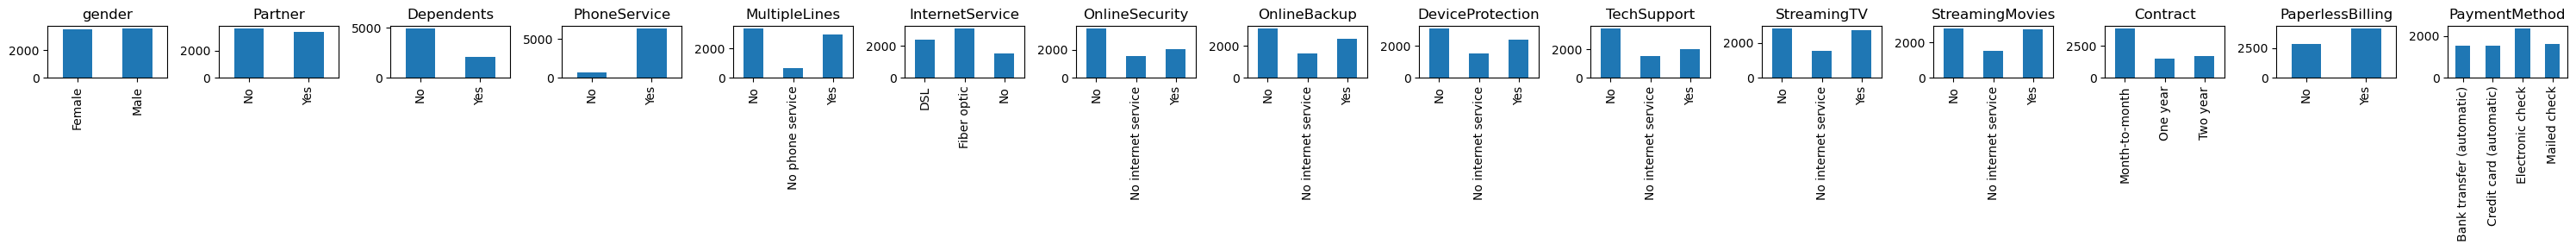

In [9]:
#Para verificar si es posible agrupar categorias
X = df2.drop(['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','customerID', 'Churn'] , axis='columns')  

fig, axes = plt.subplots(ncols=len(X.columns), figsize=(30,3))
for col, ax in zip(X, axes):
    X[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.tight_layout()    
plt.show()   

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'SeniorCitizen'}>, <AxesSubplot:>]],
      dtype=object)

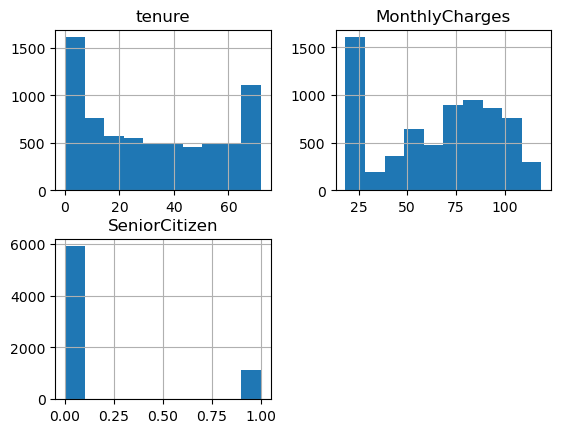

In [10]:
#Para verificar la distribucion de variables cuantitativas
df_hist2=df2.copy()
df_hist2.hist(column=['tenure','MonthlyCharges','TotalCharges','SeniorCitizen'])

    Para el estudio de Telco Churn, vemos que la mayoria de las variables de entradaa son de tipo categorico, mezcladas entre ordinales y nominales. Solo 4 de ellas son quantitativas. A su vez, hemos verificado que agrupar algunas de las familias de variables de entrada categoricas, no es una opcion.

    Al observar la distribucion de estas ultimas, notamos que su distribucion no es del todo normal, sus extremos tienden a tener picos. Para este estudio, se sugeriria probar con algun modelo de arbol de decision, o bien de red neuronal perceptron.

#3er base de datos - South German Credit

In [11]:
#This method Imports zip directly
# importing necessary modules

print('Downloading started')

#Defining the zip file URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00573/SouthGermanCredit.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
#Para poder usar request necesitamos la libreria import requests, zipfile
from io import BytesIO

req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
#zipfile= zipfile.ZipFile(BytesIO(req.content))
#zipfile.extractall('/content/sample_data/SouthGermanCredit')
df3 = pd.read_csv('content/sample_data/SouthGermanCredit/SouthGermanCredit.asc',sep=' ')
df3

df3 = df3.rename(columns={"laufkont":"status"})
df3 = df3.rename(columns={"laufzeit":"duration"})
df3 = df3.rename(columns={"moral":"credit_history"})
df3 = df3.rename(columns={"verw":"purpose"})
df3 = df3.rename(columns={"hoehe":"amount"})
df3 = df3.rename(columns={"sparkont":"savings"})
df3 = df3.rename(columns={"beszeit":"employment_duration"})
df3 = df3.rename(columns={"rate":"installment_rate"})
df3 = df3.rename(columns={"famges":"personal_status_sex"})
df3 = df3.rename(columns={"buerge":"other_debtors"})
df3 = df3.rename(columns={"wohnzeit":"present_residence"})
df3 = df3.rename(columns={"verm":"property"})
df3 = df3.rename(columns={"alter":"age"})
df3 = df3.rename(columns={"weitkred":"other_installment_plans"})
df3 = df3.rename(columns={"wohn":"housing"})
df3 = df3.rename(columns={"bishkred":"number_credits"})
df3 = df3.rename(columns={"beruf":"job"})
df3 = df3.rename(columns={"pers":"people_liable"})
df3 = df3.rename(columns={"telef":"telephone"})
df3 = df3.rename(columns={"gastarb":"foreign_worker"})
df3 = df3.rename(columns={"kredit":"credit_risk"})   #This is our output variable to predict "Y"
pd.set_option('display.max_columns', None)

df3

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


<BarContainer object of 2 artists>

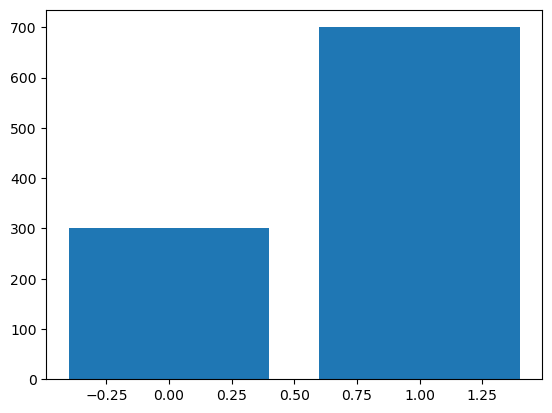

In [12]:
#Contaremos las frecuencias de cada una de las categorías de la variable independiente
plt.bar(df3['credit_risk'].unique(),df3.credit_risk.value_counts())

   credit_risk  Perc
1          700   0.7
0          300   0.3


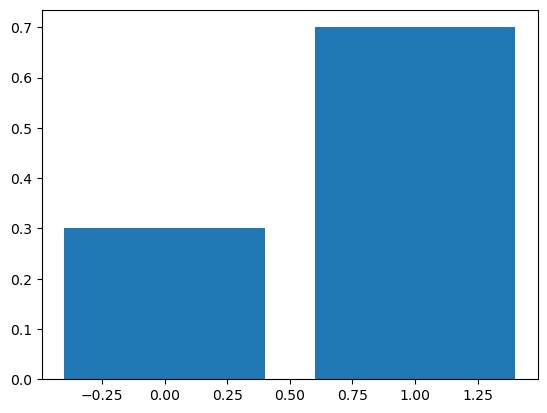

In [13]:
Porcentaje = pd.DataFrame(df3.credit_risk.value_counts())
Porcentaje['Perc'] = Porcentaje['credit_risk']/Porcentaje['credit_risk'].sum()
print(Porcentaje)
plt3 = plt.bar(Porcentaje.index.unique(),Porcentaje['Perc'])

    En este caso de la base de datos de riesgo de crédito de South german Bank, se puede observar clases de la variable independiente desbalanceadas. Por lo tanto es recomendable pasar los datos a través de procesos de sobre muestreo y sub muestreo.

    Dado que 0 se considera un mal pagador de crédito y 1 un buen pagador de crédito, vamos a querer predecir si el cliente será un mal pagador o no, dado que en este caso el otorgarle un crédito a alguien que podría potencialmente no pagar absolutamente nada, se considerará como alto riesgo los falsos negativos, por lo tanto lo que se quiere maximizar en este caso es la precisión, sin tener una referencia de alguna cuota de préstamos que se quiera dar, es difícil calcular el k óptimo de recall.

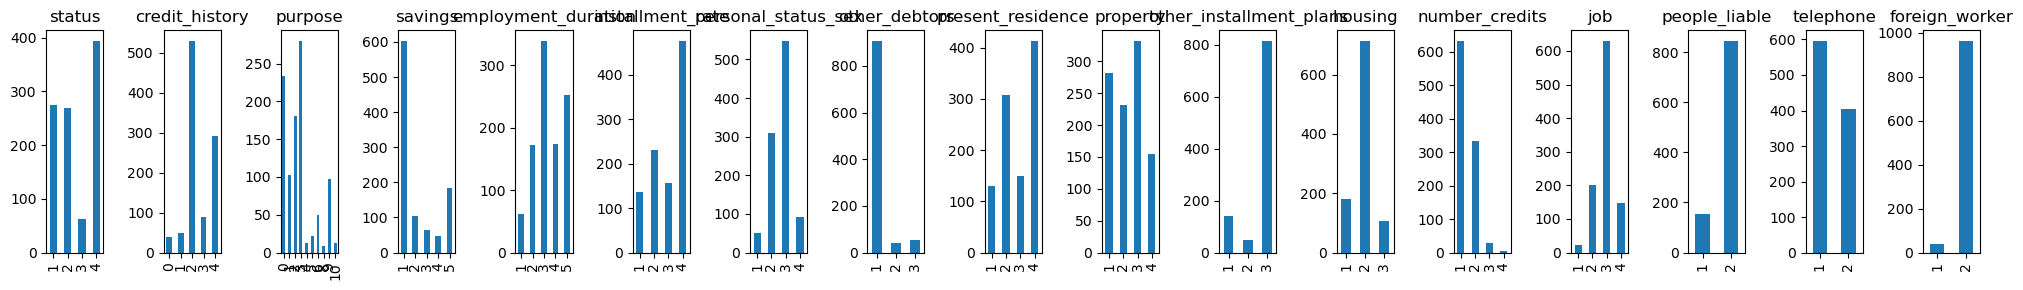

In [14]:
#Para verificar si es posible agrupar categorias
X = df3.drop(['credit_risk','amount','duration','age'] , axis='columns')  

fig, axes = plt.subplots(ncols=len(X.columns), figsize=(20,3))
for col, ax in zip(X, axes):
    X[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.tight_layout()    
plt.show()    

array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

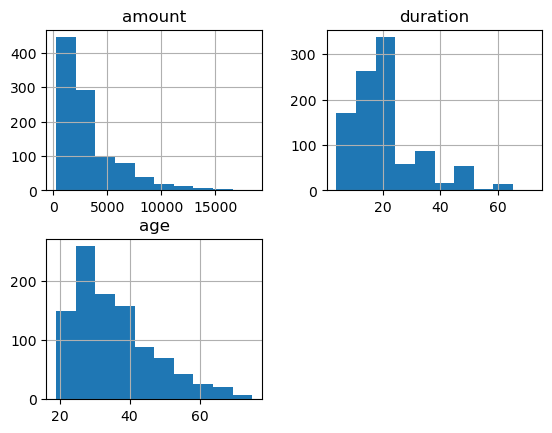

In [15]:
#Para verificar la distribucion de variables cuantitativas
df3.hist(column=['amount','duration','age'])

    Lo primero que observamos en los datos de este caso de estudio diferente a los anteriores, es que aqui si podemos agrupar 2 de sus variables de entrada:
    sex_other_debtors y number_credits. Esto si bien no disminuye mucho la capacidad de computo, puede que haga una diferencia significativa en las metricas de recall o precision. 

    En cuanto a sus variables categoricas, todas ellas nuevamente se encuentran cargadas hacia un extremo, sera necesario escalarlas (normalizarlas) por medio de un pipeline de escalamiento min_max. Para este modelo, se recomienda utilizar un modelo de regresion logistica, o red neuronal debido a la combinacion de tipos de datos observados.

#4ta base de datos Qualitative Bankruptcy data

In [16]:
Qualitative_bankruptcy_data ='content/Qualitative_Bankruptcy.data.txt'

df4 = pd.read_csv(Qualitative_bankruptcy_data,sep=',')
df4.rename(columns={'P': 'Industrial_Risk', 'P.1': 'Management_Risk', 'A':'FinancialFlexibility','A.1':'Credibility','A.2':'Competitiveness','P.2':'Operating_Risk','NB':'Class'}, inplace=True)
df4

,Industrial_Risk,Management_Risk,FinancialFlexibility,Credibility,Competitiveness,Operating_Risk,Class
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


<BarContainer object of 2 artists>

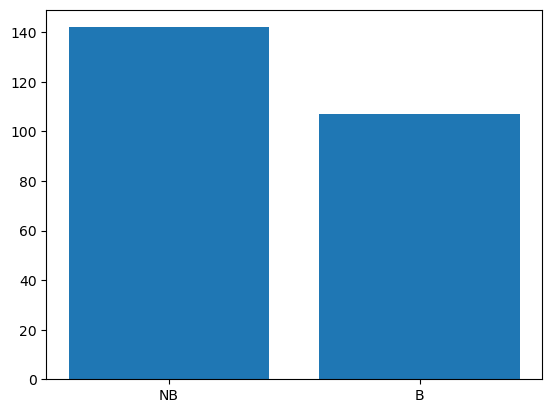

In [17]:
#Contaremos las frecuencias de cada una de las categorías de la variable independiente
plt.bar(df4['Class'].unique(),df4.Class.value_counts())

    Class      Perc
NB    142  0.570281
B     107  0.429719


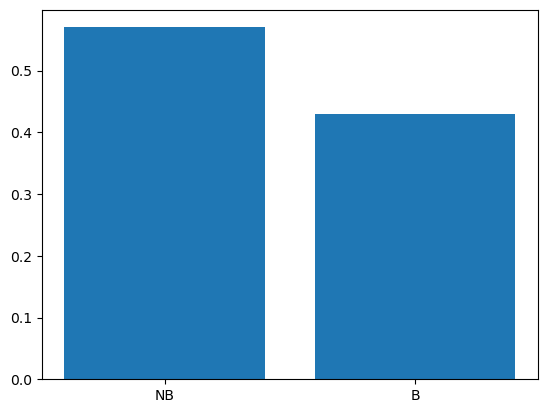

In [18]:
Porcentaje = pd.DataFrame(df4.Class.value_counts())
Porcentaje['Perc'] = Porcentaje['Class']/Porcentaje['Class'].sum()
print(Porcentaje)
plt4 = plt.bar(Porcentaje.index.unique(),Porcentaje['Perc'])

En este caso de la base de datos de riesgo de datos cualitativos de bancarota, no se observan unas clases desbalanceadas por lo tanto no es necesario hacer sobre muestro o sub muestreo.

Debido a esto debemos elegir que clase es la que se considerará positiva, para este caso 'bankruptcy' se considerará como la clase positiva y 'non-bankruptcy' como la clase negativa. Dado la naturelaza de predecir si una compañía estará o no estrá en banca rota implica mucho dinero y muchas incoveniencias para los empleados que se quedarían sin trabajos, quisiéramos minimizar las instancias en los cuales se deja a una empresa en banca rota, esto quiere decir que queremos maximizar el recall sin embargo queremos también mantener la precisión a un k alto debido a que un falso positivo también implica dinero ya que una falsa alarma de banca rota puede llevar a tomar decisiones muy extremas.

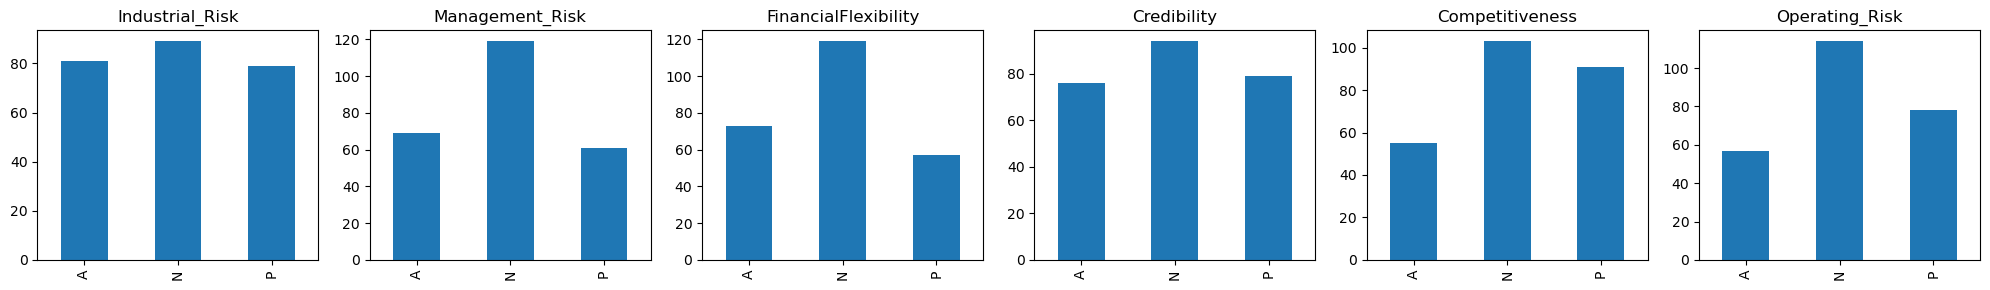

In [19]:
#Para verificar si es posible agrupar categorias
X = df4.drop(['Class'] , axis='columns')  

fig, axes = plt.subplots(ncols=len(X.columns), figsize=(20,3))
for col, ax in zip(X, axes):
    X[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.tight_layout()    
plt.show()    

    Lo mas notorio de este modelo respecto al resto, es que no cuenta con ninguna variable cuantitativa, sino puras categoricas. La posibilidad de agrupar familias es imposible ya que se encuentran muy bien balanceadas todas ellas. Seguramente un modelo de arbol de decisiones sera el mejor para este caso de estudio.